# Capstone Project 1: Milestone Report

Benhur Tedros

## Summary

Kidney failure (ESRD: end stage renal disease) is one of the leading cause of death in the United States. According to USRDS 2013 Annual data report, this disease affects almost 650,000 people per year in US, and its rate is increasing by 5% each year. Today, ESRD patients have two treament options, which are either kidney transplantation or dialysis. The best current treament is the transplantation; however, the number of kidney donors to ESRD patients ratio is 1 to 6. Moreover, the need for kidney is increasing at 8% per year while their availability has not grown to match up that number. Therefore, dialysis is the only alternative option that the patients on waiting list have. People undergoing dialysis often have multiple health concerns,which can have an adverse impact on their life expectancy, though dialysis may offer a better quality of life. According to the National Institute of Diabetes and Digestive and Kidney Diseases report, the two-year, five year and ten-year survival rates are around 64%, 33%, and 10% respectively. The survival or mortality rate varies from one dialysis facility to another. In light of this, "could we find groups of dialysis facilities with similar behaviour given a dataset of the patients' health records that have been collected during their visits?" For example, would the effect be better if the facility use hemodialysis for patient A and peritoneal dialysis for patient B or vice versa.

There are several dialysis facilities registered with Medicare in the country where patients often visit. Besides the importance of the quality of care they provide, additional health data of their patients is collected. Some of the data include mortality rate (deaths), hospitalizations, blood transfusions, incidents of hypercalcemia (too much calcium in the blood), percentage of waste removed during hemodialysis in adults and children, percentage of waste removed in adults during peritoneal dialysis, percentage of AV fistulas, percentage of catheters in use over 90 days and others. 

This capstone project will try to find a meaningful pattern within the health data of the patients and cluster the facilities with similar behaviour into groups. The result of this work will primarily help the dialysis facilities to improve their services. The Centers for Medicare & Medicaid Services of the federal government can also use the result of this project.

## Data Loading

The data for this project was publised by Centers for Medicare & Medicaid Services and was downloaded from the DATA.MEDICARE.GOV. The dataset is comprised of data on anemia management, phosphorus levels, transfusion rate, dialysis adequacy, vascular access, mineral and bone disorder, hospitalization rate, readmission rate,infection ratio, scale rate of the facility and others.
               
Two additional dataset were also used to merge with the original one. The first dataset includes population size for each counties, and the second one has an information on household income based on counties. 

## Data Wrangling and Cleaning

The dataset are stored in MS Excel spreadsheet in CSV format, which were easily loaded into pandas dataframes. Several components of data wrangling were utilized to make the dataset ready to be used for analysis and prediction. The dataset was originally in the format of CSV and loaded to the python notebook. It contains 6810 observations with 98 data fields with some missing/null values. Many of the names of the data fields were too long and were shortened for our convenience. The dataset was subset into fewer data fields/features depending on their scalability nature and importance to our prediction. Some of the columns in the dataset contained categorical variables, but were converted into numerical nature in order to get them included in the analysis. As this dataset was short of information on population size and household income in each county where the dialysis facilities are located, two additional dataset with the same data were merged to the original dataset before conducting the exploratory data analysis.

The libraries used in this section include numpy, pandas, matplotlib, and scikit-learn.

In [1]:
# Importing the required libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import os

In [2]:
# Setting up the path directory
os.chdir('F:\\BENHUR_FOLDER\\Data_Science_Career_Track\\Capstone_Project')
os.getcwd() 

'F:\\BENHUR FOLDER\\Data Science Career Track\\Capstone Project'

In [3]:
# Loading the csv datafile into pandas dataframes
data = pd.read_csv('Dialysis_Mortality.csv')

# Getting information on the data fields, attributes,data types,field names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 98 columns):
Provider Number                                                                              6810 non-null object
Network                                                                                      6810 non-null int64
Facility Name                                                                                6810 non-null object
Five Star Date                                                                               6810 non-null object
Five Star                                                                                    6017 non-null float64
Five Star Data Availability Code                                                             6810 non-null int64
Address Line 1                                                                               6810 non-null object
Address Line 2                                                                               101

In [4]:
# Subsetting the features needed for the prediction
feature_select= pd.DataFrame(data.iloc[:,[1,2,4,9,11,13,14,16,17,18,19,20,25,27,33,44,46,53,57,58,59,60,61,74,77,80,87,91,94]])

In [5]:
# Rename some of the features for convenience
features_all = feature_select.rename(columns = {'Facility Name':'facility_name','Profit or Non-Profit':'Profit_YesNo','Five Star':'five_star','# of Dialysis Stations':'Dial_Stations','Offers in-center hemodialysis':'hemodial_incenter',
                                      'Offers in-center peritoneal dialysis':'perit_incenter','Offers home hemodialysis training':'hemoTrain_home','Chain Owned':'chain_owned','Late Shift':'late_shift',
                                      'Percentage of Medicare patients with Hgb<10 g/dL':'Medicare_Patient_Hgb<10','Percentage of Medicare patients with Hgb>12 g/dL':
                                      'Medicare_Patient_Hgb>12','Percent of Adult HD patients with Kt/V >= 1.2':'HD_Patient_Kt/V >= 1.2','Percentage of Pediatric HD patients with Kt/V >= 1.2':
                                      'HD_Pediatric_Kt/V >= 1.2','Percentage of patients with arteriovenous fistulae in use':'Pat_AV_fistulae',
                                      'Percentage of patients with vascular catheter in use for 90 days or longer':'Pat_Vasc-Catheter_90days',
                                      'Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL)':'Pat_hypercalcemia',
                                      'Percentage of Adult patients with serum phosphorus less than 3.5 mg/dL':'SerumPhos_<3.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 3.5-4.5 mg/dL':'SerumPhos_3.5-4.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 4.6-5.5 mg/dL':'SerumPhos_4.6-5.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 5.6-7.0 mg/dL':'SerumPhos_5.6-7.0mg/dL',
                                      'Percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL':'SerumPhos_>7.0mg/dL',
                                      'Mortality Rate (Facility)':'Mortality_rate', 'Readmission Rate (Facility)':'Readmission_rate',                                     
                                      'Hospitalization Rate (Facility)':'Hospitalization_rate',
                                      'Percentage of adult PD patients with Kt/V>=1.7':
                                      'PD_Pat_Kt/V>=1.7','Standard Infection Ratio':'Infection_ratio','Transfusion Rate (Facility)':'Transfusion_rate'})                                                 

In [6]:
# regrouping the columns to line up the predictor variables together and 
# move the facility name to the first column

# To get a list of columns
cols = list(features_all)

# To move the column to last of columns' list
cols.insert(0, cols.pop(cols.index('facility_name')))


# To reorder the columns
features_all = features_all.ix[:, cols]

C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if sys.path[0] == '':


In [7]:
from sklearn.preprocessing import LabelEncoder

# To convert the categorical inputs of some data fields to numerical nature

numeric = LabelEncoder()
features_all['Profit_YesNo']=numeric.fit_transform(features_all['Profit_YesNo'].astype('str'))
features_all['chain_owned']=numeric.fit_transform(features_all['chain_owned'].astype('str'))
features_all['late_shift']=numeric.fit_transform(features_all['late_shift'].astype('str'))
features_all['hemodial_incenter']=numeric.fit_transform(features_all['hemodial_incenter'].astype('str'))
features_all['perit_incenter']=numeric.fit_transform(features_all['perit_incenter'].astype('str'))
features_all['hemoTrain_home']=numeric.fit_transform(features_all['hemoTrain_home'].astype('str'))


In [8]:
# Some of the features contain a "%" symbol, which has to be cleaned.
# Getting rid off the % symbol from the respective columns

features_all[['Medicare_Patient_Hgb<10','Medicare_Patient_Hgb>12','HD_Patient_Kt/V >= 1.2',
              'Pat_AV_fistulae','Pat_Vasc-Catheter_90days','Pat_hypercalcemia','SerumPhos_<3.5mg/dL',
              'SerumPhos_3.5-4.5mg/dL','SerumPhos_4.6-5.5mg/dL','SerumPhos_>7.0mg/dL']] \
= features_all[['Medicare_Patient_Hgb<10','Medicare_Patient_Hgb>12','HD_Patient_Kt/V >= 1.2',
                'Pat_AV_fistulae','Pat_Vasc-Catheter_90days','Pat_hypercalcemia','SerumPhos_<3.5mg/dL',
              'SerumPhos_3.5-4.5mg/dL','SerumPhos_4.6-5.5mg/dL','SerumPhos_>7.0mg/dL']]\
              .replace('%','',regex=True).astype('float')

Two additional dataset named as "Population_county" and "Income_county" were merged to the original dataset (Dialysis_Mortality) based on State and county data fields, as both could be valuable datafields for our analysis, . The next three cells show the merging and cleaning steps.

In [9]:
#Loading county based population size dataset

pop_county= pd.read_csv('Population_county.csv',encoding='latin-1')

# Selecting the total population size as of recent estimate(2016) and for all ages together

pop_county = pop_county.loc[(pop_county['YEAR'] == 9) & (pop_county['AGEGRP'] == 0), :]

# Slicing the dataset based on County and State, as the county with the same name may exist in different states.

pop_county = pop_county.groupby(['County','State'],as_index=False).sum()

# Before merging the datasets, the county names used in both data frames should be the same.
# To fulfill that, all are converted to upper case, and any space within two words county name were deleted

pop_county['County']=pop_county['County'].str.upper()
pop_county['County']=pop_county['County'].str.replace('\s+', '')
features_all['County']=features_all['County'].str.replace('\s+', '')

# Merging the population table with the mortality table based on county and state
mort_pop = pd.merge(features_all, pop_county, how='left',on=['County','State'])

# Moving the county and state to the front columns

c=list(mort_pop)
c.insert(1, c.pop(c.index('County')))
c.insert(2, c.pop(c.index('State')))

mort_pop =mort_pop.ix[:,c]


C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [10]:
#Loading county based income dataset
income_county = pd.read_csv('Income_County.csv',encoding='latin-1')

# Listing the states' name with its abbreviations
state = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California','CO': 'Colorado',
        'CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia','GU': 'Guam','HI': 'Hawaii',
        'IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana','MA': 'Massachusetts',
        'MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi',
        'MT': 'Montana','NA': 'National','NC': 'North Carolina','ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire',
        'NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon',
        'PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee',
        'TX': 'Texas','UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands','VT': 'Vermont','WA': 'Washington','WI': 'Wisconsin',
        'WV': 'West Virginia','WY': 'Wyoming'}

# Adding the abbreviations to the datasets
state= {State: abbrev for abbrev, State in state.items()}
income_county['State'] = income_county['State'].map(state)

# Converting the county name into uppercase letters, and any spaces between two worded county name has been omitted.
income_county['County'] = income_county['County'].str.upper()
income_county['County']=income_county['County'].str.replace('\s+', '')

# Merging the income info with the mortality table based on county and state
mort_popIncome = pd.merge(mort_pop, income_county,how='left',on=['County','State'])

# Dropping population variable from the dataset, as we already have a population feature added from the other dataset
total_mortRate = mort_popIncome.loc[:,mort_popIncome.columns!='Population']

#converting the features with a string type into the categorical inputs
total_mortRate['County']=numeric.fit_transform(total_mortRate['County'].astype('str'))

C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
# move the five_star to the last column for convience
co=list(mort_pop)
co.insert(49, co.pop(co.index('Mortality_rate')))
total_mortRate =total_mortRate.ix[:,co]

total_mortRate.info()

C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6810 entries, 0 to 6809
Data columns (total 47 columns):
facility_name               6810 non-null object
County                      6810 non-null int64
State                       6810 non-null object
Network                     6810 non-null int64
five_star                   6017 non-null float64
Profit_YesNo                6810 non-null int64
chain_owned                 6810 non-null int64
late_shift                  6810 non-null int64
Dial_Stations               6810 non-null int64
hemodial_incenter           6810 non-null int64
perit_incenter              6810 non-null int64
hemoTrain_home              6810 non-null int64
Medicare_Patient_Hgb<10     5952 non-null float64
Medicare_Patient_Hgb>12     5952 non-null float64
HD_Patient_Kt/V >= 1.2      6066 non-null float64
Pat_AV_fistulae             6149 non-null float64
Pat_Vasc-Catheter_90days    6149 non-null float64
Pat_hypercalcemia           6412 non-null float64
SerumPhos_<3.

The dataset was cleaned and subset to 6810 observations and 47 data fields, and the dataset is now ready for exploration and data analysis.

### III) Explaratory data Analysis (EDA) and Inferential Statistics

Explaratory data analysis for this dataset is useful in determining relationships among the explanatory variables, preliminary selection of appropriate models and assessing the direction and rough size of relationships between explanatory and outcome variables. This section will try to answer if there are variables in dataset that are particularly significant in terms of explaining the mortality rate. Moreover, are there strong correlations between pairs of independent variables, or between an independent and a dependent variable (mortality rate)? Before hand, it is vital to explore the distribution of the some of the features such as Mortality_rate, five_star (which is 1-5 scale reviews for the facilities) across the States. The mean and median of the Mortality_rate and five_star variables across the States will be explored. This will help us to explore the variations and similarities among the dialysis facilities with the same or different States.

#### Hypothesis:

Some of the health data such as readmission, hospitalization, standard infection rates are believed to show a strong positive correlations to the Mortality_rate. Moreover, patients with arteriovenous_fistulae has a lower risk of infection than patients with catheters, and so does their Mortality_rate. Therefore, exploring mortality rate across each States is vital,which is believed to show some trend. The five_star variable is also expected to display some variations. 

Null Hypothesis, 
- Ho: There is no correlation between the pairs of independent variables, or between an independent and a dependent variable (mortality rate).

Alternative Hypothesis, 
- Ha:There is no correlation between the pairs of independent variables, or between an independent and a dependent variable (mortality rate).

This hypothesis will be tested in this section.

In [12]:
# Loading the necessary python packages
from pandas.tools.plotting import scatter_matrix
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

C:\Users\benbahtin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


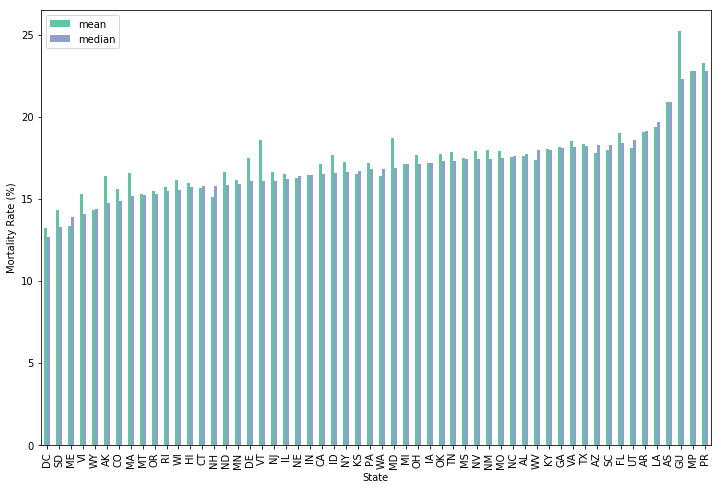

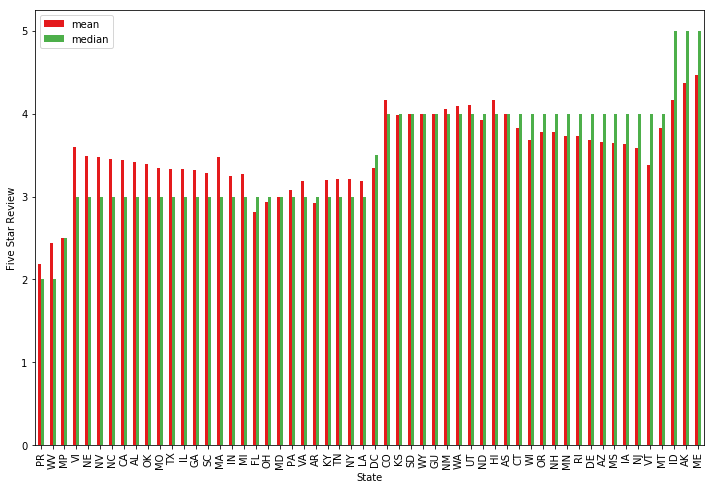

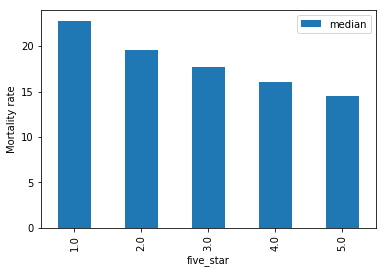

In [13]:
# Subsetting the State based on the mortality_rate
mort_state = total_mortRate.groupby('State',as_index=True)['Mortality_rate'].agg(['mean', 'median'])
mort_state = mort_state.sort_values(by='mean')
mort_state1 = mort_state.sort_values(by='median')
colors = plt.cm.Set2(np.linspace(0,1,5))
mort_state1.plot.bar(figsize=(12,8),color = colors).set_ylabel('Mortality Rate (%)')

# Subsetting the State based on the five_star 
fiveStar_state = total_mortRate.groupby('State',as_index=True)['five_star'].agg(['mean', 'median'])
fiveStar_state = fiveStar_state.sort_values(by='mean')
fiveStar_state1 = fiveStar_state.sort_values(by='median')
colors = plt.cm.Set1(np.linspace(0,1,5))
fiveStar_state1.plot.bar(figsize=(12,8),color = colors).set_ylabel('Five Star Review')

# Exploring the mortality_rate against the five_star reviews

star = total_mortRate.groupby('five_star',as_index=True)['Mortality_rate'].agg(['median'])
star.plot.bar().set_ylabel('Mortality rate')


C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  
C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  
C:\Users\benbahtin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
C:\Users\benbahtin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3193: UserWarning: Attempting to set id

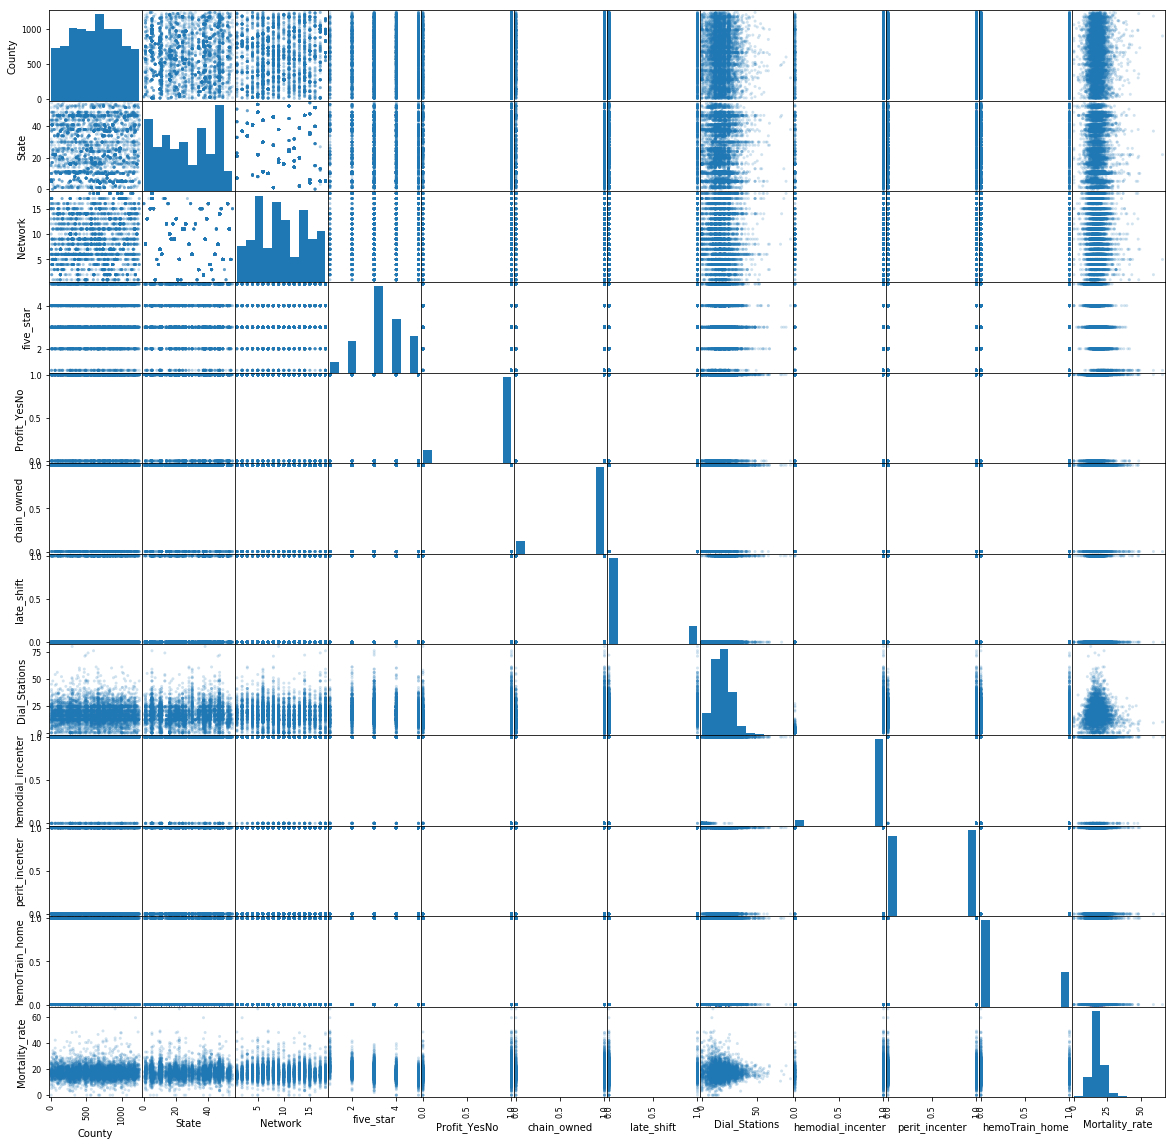

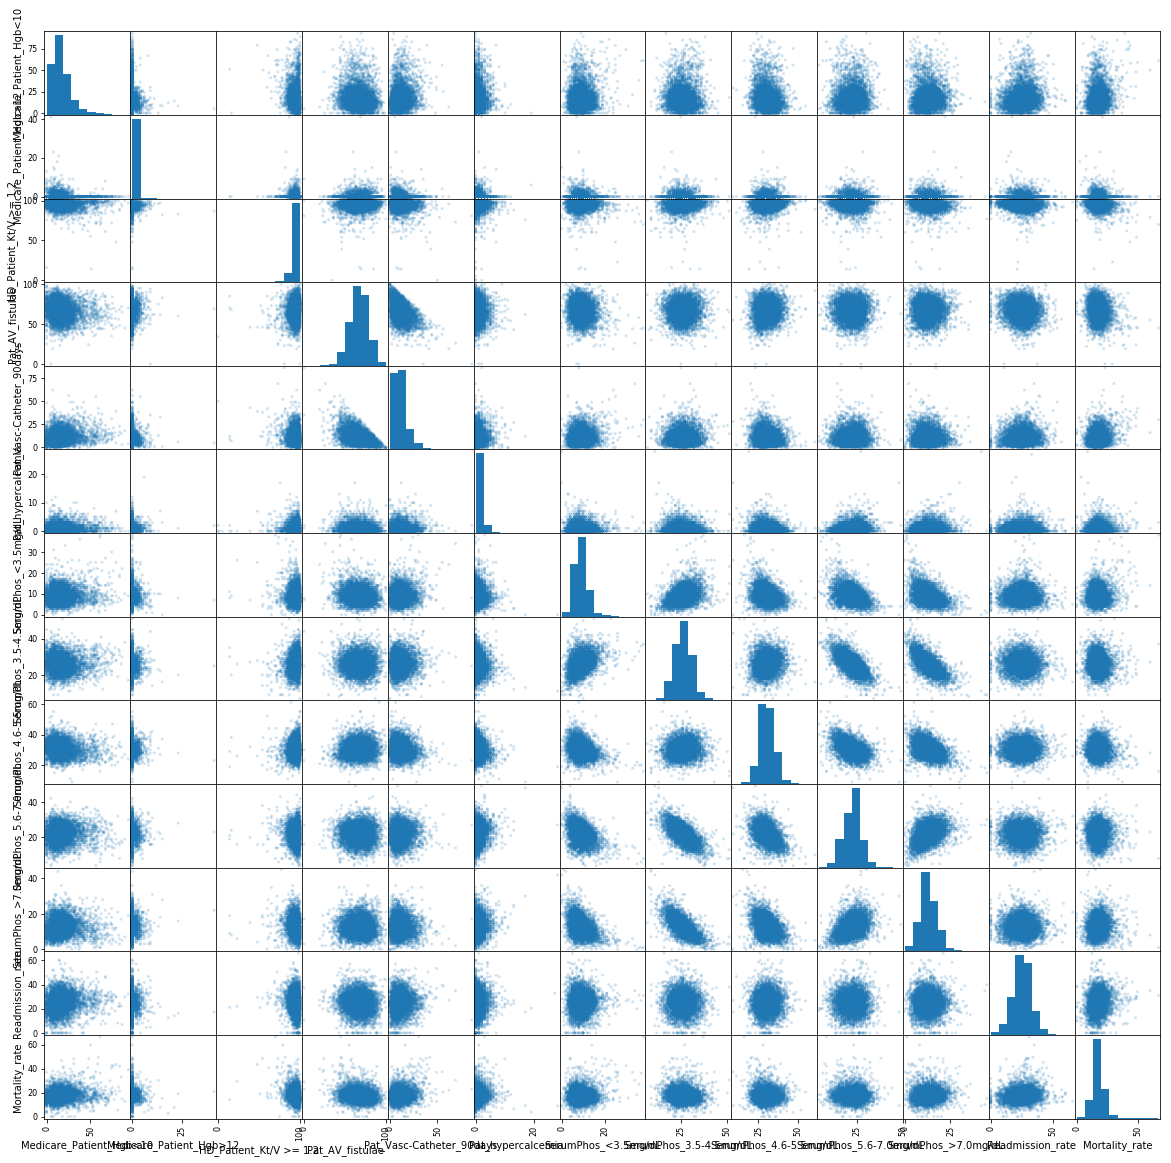

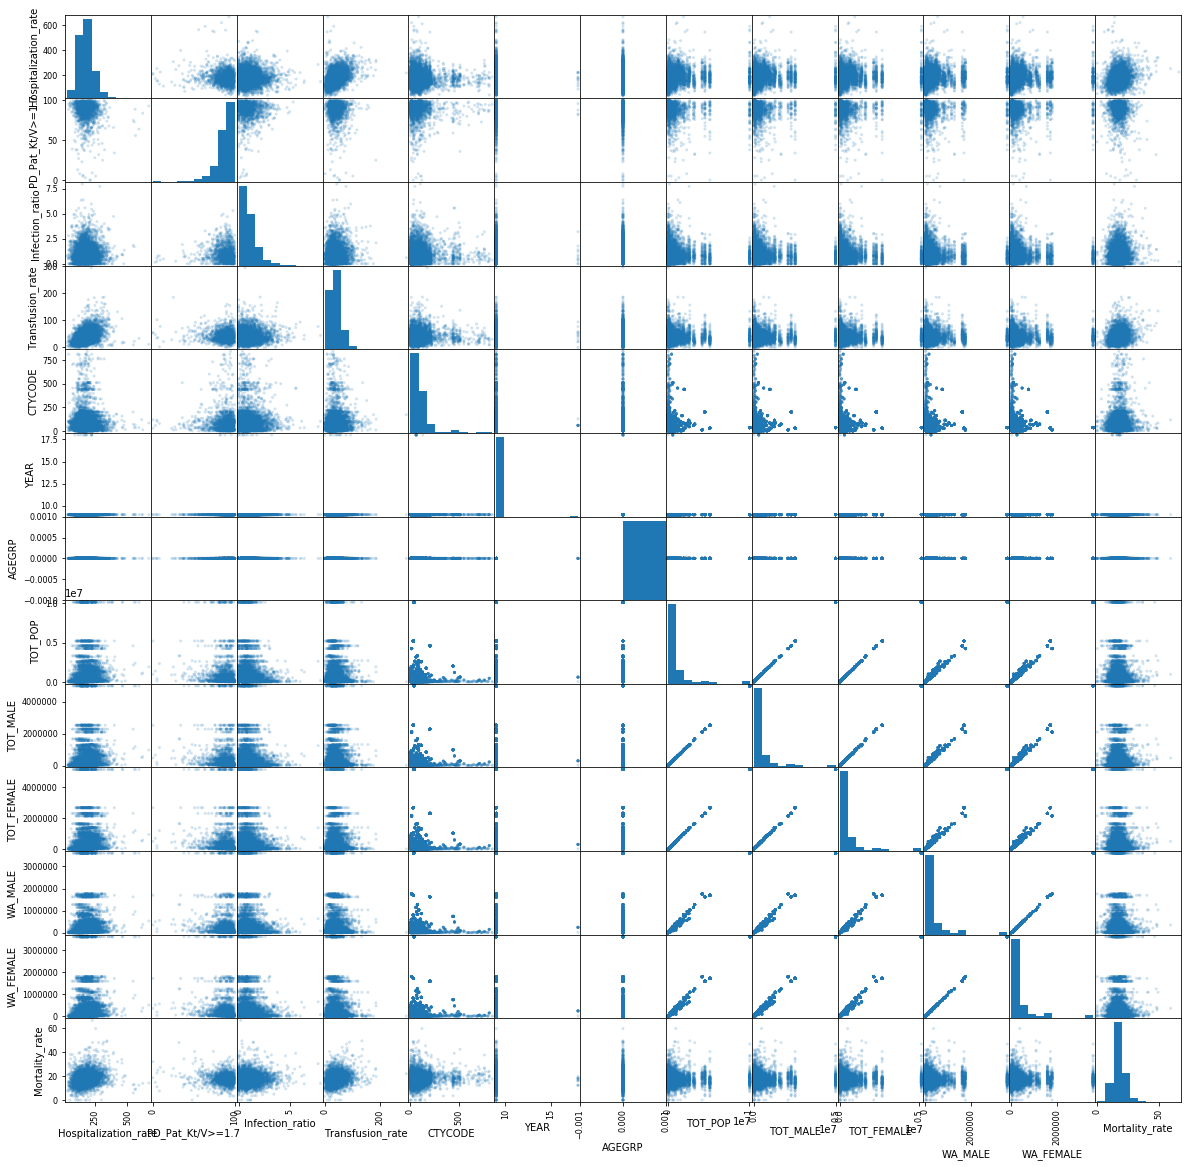

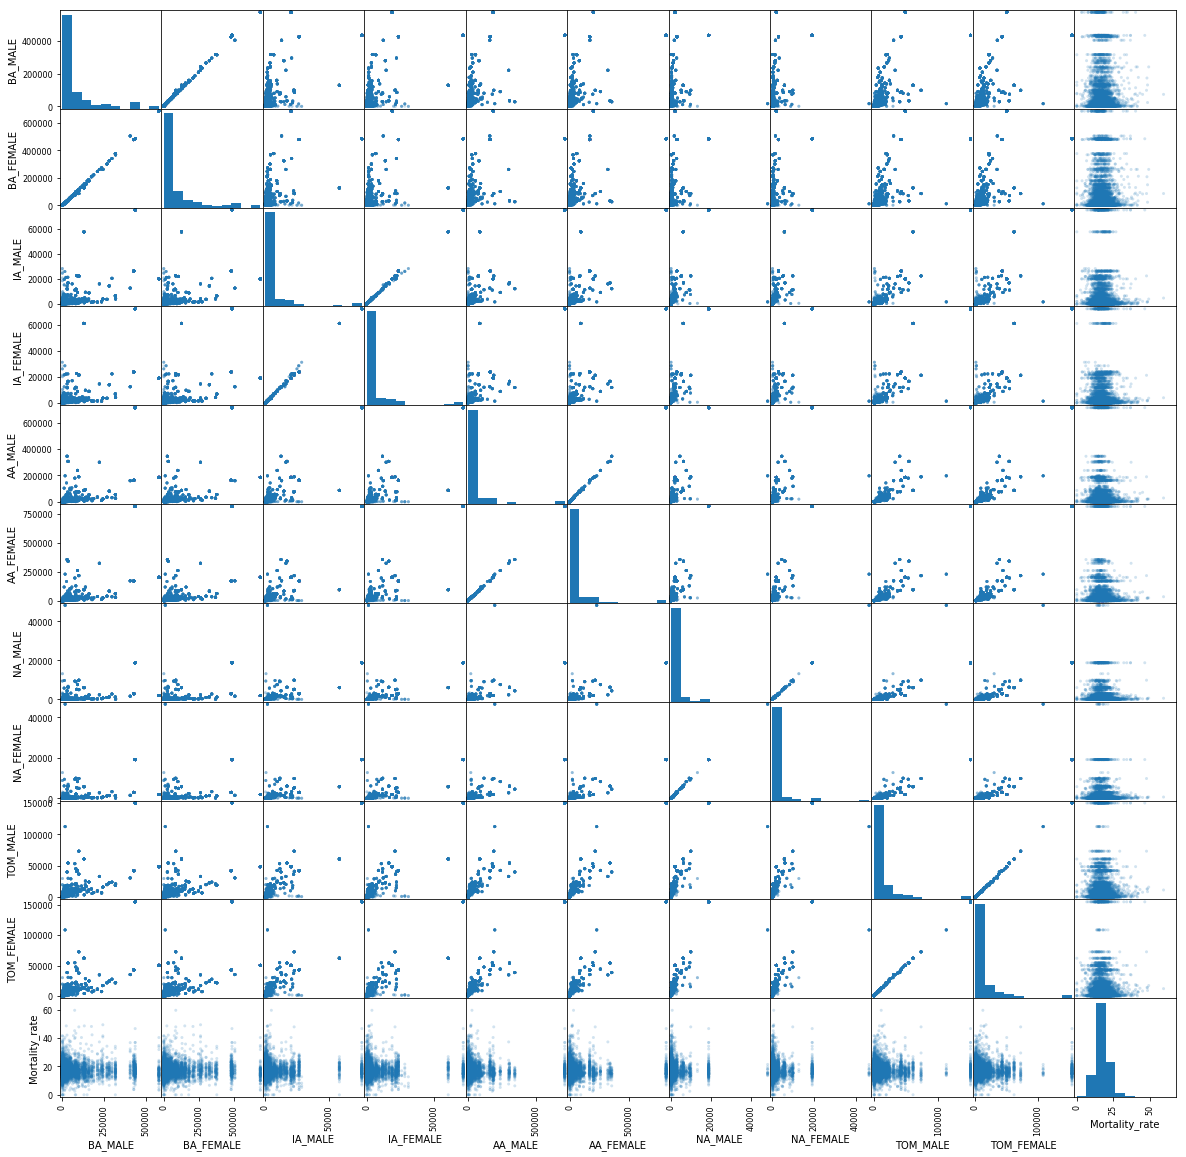

In [14]:
# Comparing the trend of the Mortality rate variable to the other features

total_mortRate['State']=numeric.fit_transform(total_mortRate['State'].astype('str'))
list(total_mortRate).index('Mortality_rate')


test1 = total_mortRate.iloc[:, np.r_[1:12,46]]
scatter_matrix(test1, alpha=0.2, figsize=(20, 20), diagonal='hist');

test2 = total_mortRate.iloc[:, np.r_[12:24,46]]
scatter_matrix(test2, alpha=0.2, figsize=(20, 20), diagonal='hist');

test3 = total_mortRate.iloc[:, np.r_[24:36,46]]
scatter_matrix(test3, alpha=0.2, figsize=(20, 20), diagonal='hist');

test4 = total_mortRate.iloc[:, np.r_[36:46,46]]
scatter_matrix(test4, alpha=0.2, figsize=(20, 20), diagonal='hist');


C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


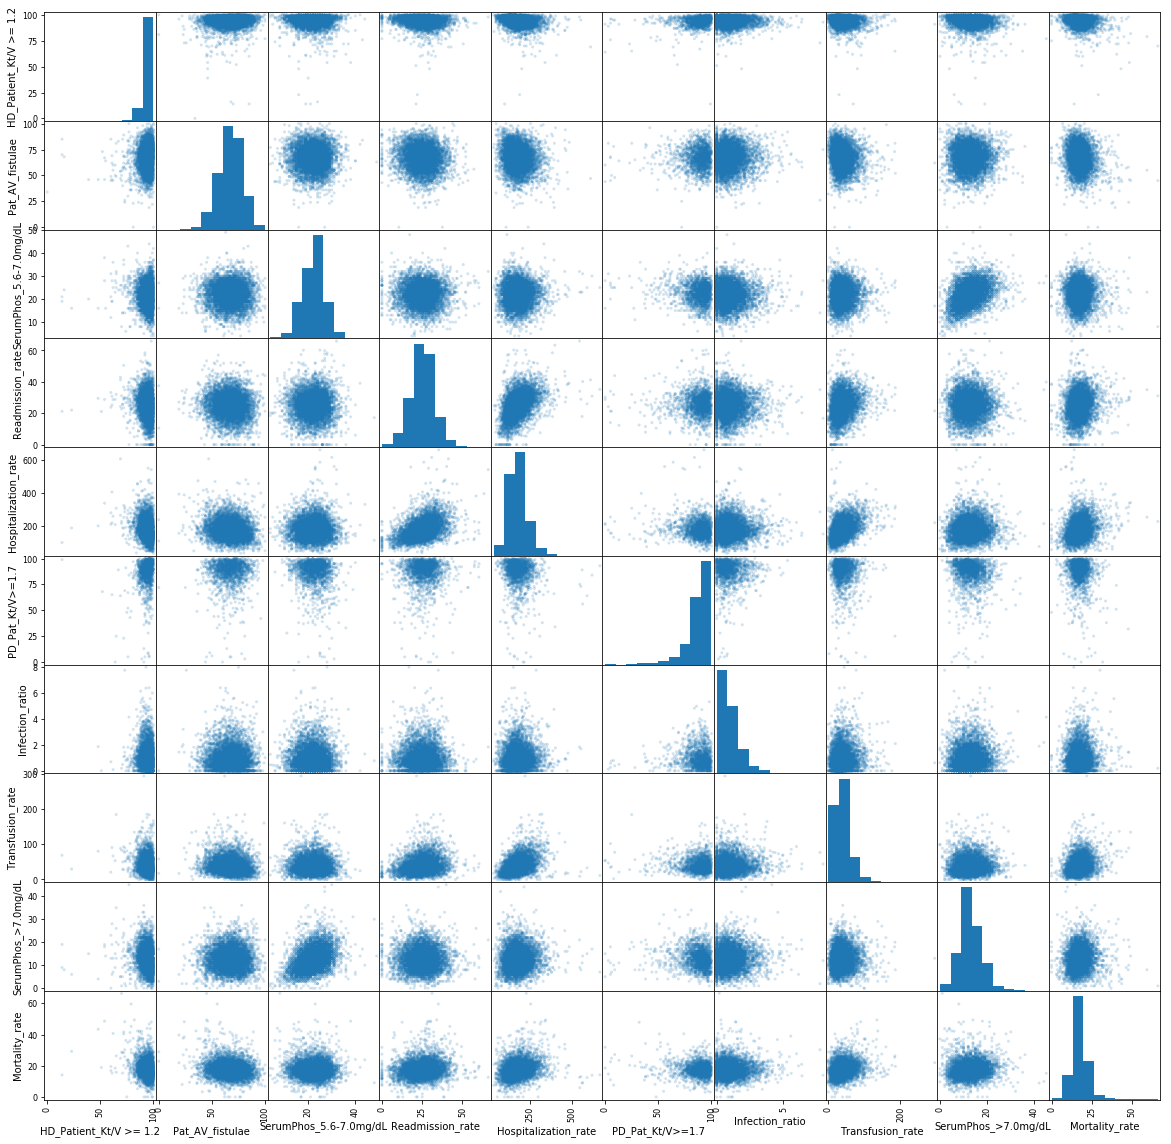

In [15]:
# Ploting the mortality rate against those features which showes some pattern/trend
relate = total_mortRate.iloc[:, [14,15,21,23,24,25,26,27,22,46]]
relate = scatter_matrix(relate, alpha=0.2, figsize=(20, 20), diagonal='hist');

## Finding linear relationship between Mortality rate and the other features

In [16]:
## There are some null values in the response variable,Mortality rate, and the null/missing values are dropped.
total_mortRate=total_mortRate.dropna(subset=['Mortality_rate'],how='any')

# Separating the predictors and the target variables
x = total_mortRate.loc[:, total_mortRate.columns != 'Mortality_rate']
y = total_mortRate.loc[:, 'Mortality_rate']

x=x.loc[:,x.columns != 'facility_name']


X=x.values[:,0:45]
y=y.values[:,]


### Imputing and standarizing the predictor variables

In [17]:
# Create our imputer to replace missing values with the median 
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp = imp.fit(X)

# Impute our data, then train
mortality_imp = imp.transform(X)

# Standarizing the dataset
X_scaled = preprocessing.scale(mortality_imp)
best=pd.DataFrame(X_scaled,y)

#### Applying OLS

In [18]:
# Applying Correlation matrix to see the relationships between the response and feature variables

model = sm.OLS(y, X_scaled).fit()
predictions = model.predict(X_scaled)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.762
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           9.45e-09
Time:                        17:23:32   Log-Likelihood:                -26482.
No. Observations:                6140   AIC:                         5.305e+04
Df Residuals:                    6098   BIC:                         5.333e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1204      0.266     -0.452      0.651      -0.642       0.401
x2            -0.0712      0.263     -0.270      0.787      -0.587       0.445
x3             0.1237      0.306      0.404      0.686      -0.476       0.723
x4            -2.8437      0.430     -6.611      0.000      -3.687      -2.001
x5             0.3540      0.259      1.366      0.172      -0.154       0.862
x6            -0.2233      0.263     -0.850      0.395      -0.738       0.292
x7            -0.0909      0.244     -0.372      0.710      -0.570       0.388
x8            -0.0785      0.269     -0.291      0.771      -0.606       0.450
x9             0.1193      0.268      0.445      0.656      -0.406       0.645
x10           -0.3139      0.284     -1.106      0.269      -0.870       0.242
x11           -0.0540      0.281     -0.192      0.848      -0.605       0.497
x12            0.1717      0.252      0.682      0.496      -0.322       0.665
x13           -0.0325      0.234     -0.139      0.890      -0.492       0.427
x14           -0.1577      0.260     -0.606      0.544      -0.668       0.352
x15            0.7549      0.306      2.466      0.014       0.155       1.355
x16           -0.3053      0.304     -1.004      0.315      -0.901       0.291
x17           -0.2530      0.248     -1.018      0.309      -0.740       0.234
x18            0.1771      1.199      0.148      0.883      -2.174       2.528
x19           -0.5682      1.570     -0.362      0.717      -3.646       2.510
x20           -0.3033      1.635     -0.186      0.853      -3.508       2.902
x21           -0.5858      1.640     -0.357      0.721      -3.800       2.628
x22           -0.0647      1.613     -0.040      0.968      -3.227       3.097
x23            0.0993      0.262      0.379      0.704      -0.414       0.613
x24           -0.0359      0.314     -0.114      0.909      -0.652       0.580
x25            0.0523      0.241      0.217      0.829      -0.421       0.526
x26            0.1013      0.235      0.430      0.667      -0.360       0.563
x27           -0.2950      0.279     -1.058      0.290      -0.842       0.252
x28            0.2749      0.278      0.988      0.323      -0.270       0.820
x29           -0.0745      0.233     -0.320      0.749      -0.531       0.382
const       2.569e-13   3.48e-13      0.739      0.460   -4.25e-13    9.39e-13
x30           14.5058     15.039      0.965      0.335     -14.976      43.987
x31           22.3510     18.018      1.241      0.215     -12.970      57.672
x32            9.5570     22.302      0.429      0.668     -34.163      53.277
x33           -1.3127     25.176     -0.052      0.958     -50.666      48.041
x34          -29.4814     23.966     -1.230      0.219     -76.463      17.500
x35           -3.8016     10.614     -0.358      0.720     -24.609      17.006
x3

### Initial Findings

The mortality rate was ploted against 45 different features which are the health data of patients on dialysis,population and household income of the counties where the facilities are located at. After the dataset was wrangled and cleaned, it was utilized for analysis and tried to insight any pattern out of the independent and dependent variables. Based on the scatter plots and correlation matrix, the mortality rate against many of the features did not show a strong linear relationship or have a slight pattern. Their relationships seem to be non-linear in most of them, which should be analysed further by utilizing other types of classification or clustering. The features which showed a linear trend with the mortality rate include the hospitalization rate, readmission rate, tranfusion rate, infection ratio, five star,and percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL (see plot-5). It is a general truth(in most cases), the mortality rate has a positive relationship with the feature listed above. The sample analysis also proved that the mortality rate increases with an increase in the values of the independent variables listed above.

As it can be seen above, a multivariate linear analysis has also been done on the dataset using OLS. The summary of the analysis shows almost all explanatory variables have their P-value of greater than confidence interval of 0.05. This indicates that there is no a statistically significant relationship between most of the features and the response variable. The R-squared yielded to less than 2%, which seems to be very low and leaved a large amount of variation in the response variable unexplained. In light of this, it was concluded that this project should be taken as unsupervised learning problem and recommended to used clustering algorithms.
